# Problem statement:

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Defining the path for train and test images for local
## Todo: Update the paths of the train and test dataset
# path_to_training_dataset = "Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Train"
# path_to_test_dataset = 'Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Test'
# data_dir_train = pathlib.Path(path_to_training_dataset)
# data_dir_test = pathlib.Path(path_to_test_dataset)

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

path_to_training_dataset = "/content/gdrive/My Drive/Upgrad/Resources/Assignments/CNN- melonoma/Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Train"
path_to_test_dataset = '/content/gdrive/My Drive/Upgrad/Resources/Assignments/CNN- melonoma/Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Test'

data_dir_train = pathlib.Path(path_to_training_dataset)
data_dir_test = pathlib.Path(path_to_test_dataset)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  labels='inferred',
  label_mode='categorical',
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  labels='inferred',
  label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [9]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [10]:
#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

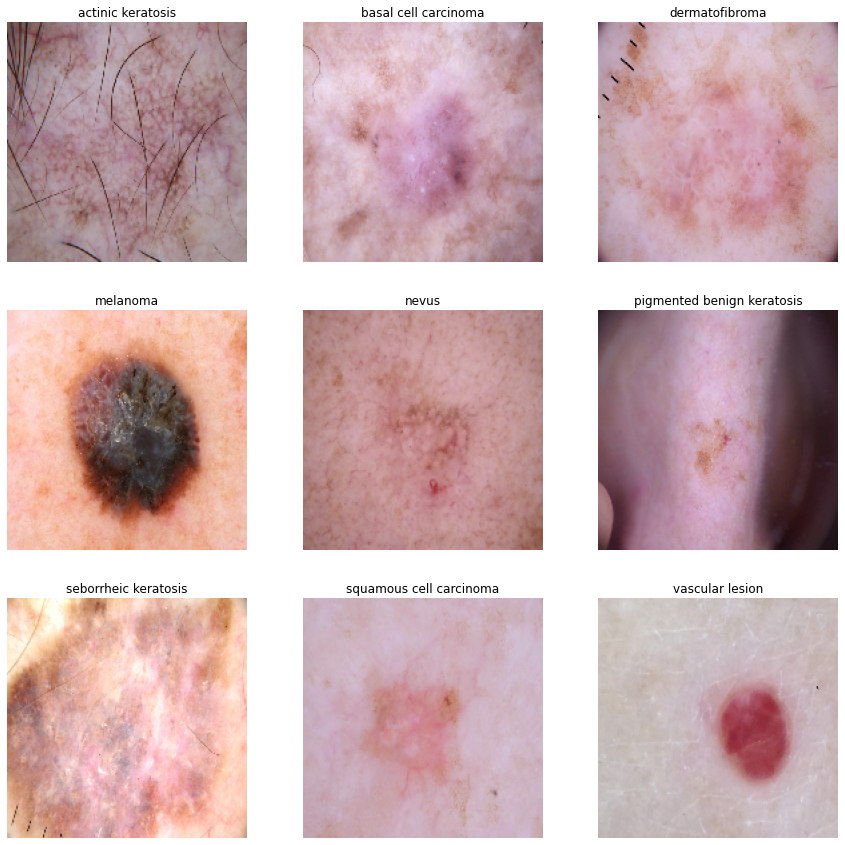

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

index = 0
plt.figure(figsize=(15,15))
for c in class_names:
    path_list = files_path_dict[c][:2]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
from tensorflow.keras.layers import BatchNormalization

#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer


#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 340s 1s/step - loss: 2.1631 - accuracy: 0.1830 - val_loss: 2.0175 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 2s 39ms/step - loss: 2.0161 - accuracy: 0.2360 - val_loss: 1.9109 - val_accuracy: 0.3154
Epoch 3/20
56/56 [==============================] - 2s 38ms/step - loss: 1.7957 - accuracy: 0.3594 - val_loss: 1.6056 - val_accuracy: 0.4519
Epoch 4/20
56/56 [==============================] - 2s 38ms/step - loss: 1.6180 - accuracy: 0.4403 - val_loss: 1.5393 - val_accuracy: 0.4810
Epoch 5/20
56/56 [==============================] - 2s 38ms/step - loss: 1.4663 - accuracy: 0.4950 - val_loss: 1.4276 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 2s 38ms/step - loss: 1.3930 - accuracy: 0.5106 - val_loss: 1.4076 - val_accuracy: 0.5213
Epoch 7/20
56/56 [==============================] - 2s 38ms/step - loss: 1.3916 - accuracy: 0.5151 - val_loss: 1.3733 - val_accuracy: 0.5257
Epoch 8/20
56

### Visualizing training results

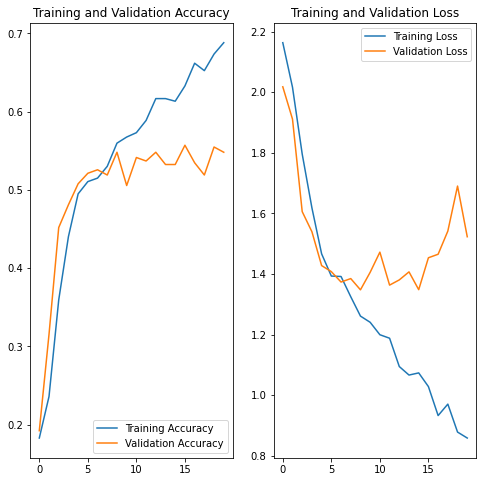

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

14/14 [==============================] - 0s 16ms/step - loss: 1.5227 - accuracy: 0.5481
Accuracy:  0.765625
Validation Accuracy:  0.5480984449386597
Loss:  0.6652753949165344
Validation Loss 1.522746205329895


In [19]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

image_class = ['nevus','melanoma','basal_cell_caricoma','actinic_keratosis','vasc_lesion','dermatofibroma', 'pigmented_keratosis', 'seborrheic_keratosis', 'squamous_carci']

train_batches = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
 )

valid_batches = datagen.flow_from_directory(data_dir_test, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
)

Found 890 images belonging to 9 classes.
Found 48 images belonging to 9 classes.


In [20]:
train_batches

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer


#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compiling the model

In [22]:
## Your code goes here
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [23]:
# Set a learning rate annealer
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

### Training the model

In [24]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20

history = model.fit(train_batches,
  epochs = epochs, verbose = 1, validation_data=valid_batches , callbacks=[learning_rate_reduction])

Epoch 1/20
14/14 [==============================] - 52s 4s/step - loss: 1.8277 - accuracy: 0.4562 - val_loss: 1.3410 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/20
14/14 [==============================] - 31s 2s/step - loss: 0.9864 - accuracy: 0.4843 - val_loss: 1.3382 - val_accuracy: 0.3542 - lr: 0.0010
Epoch 3/20
14/14 [==============================] - 30s 2s/step - loss: 0.8776 - accuracy: 0.5562 - val_loss: 1.3213 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 4/20
14/14 [==============================] - 30s 2s/step - loss: 0.8504 - accuracy: 0.5629 - val_loss: 1.5481 - val_accuracy: 0.3542 - lr: 0.0010
Epoch 5/20
14/14 [==============================] - 30s 2s/step - loss: 0.7952 - accuracy: 0.6382 - val_loss: 1.5371 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 6/20
14/14 [==============================] - 30s 2s/step - loss: 0.7482 - accuracy: 0.6326 - val_loss: 1.2999 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 7/20
14/14 [==============================] - 30s 2s/step - loss: 0.7263 - a

### Visualizing the results

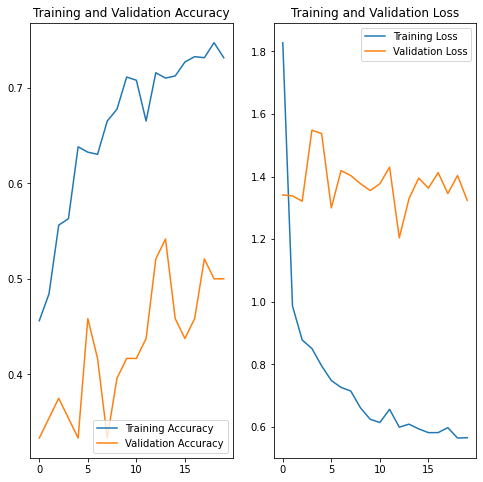

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

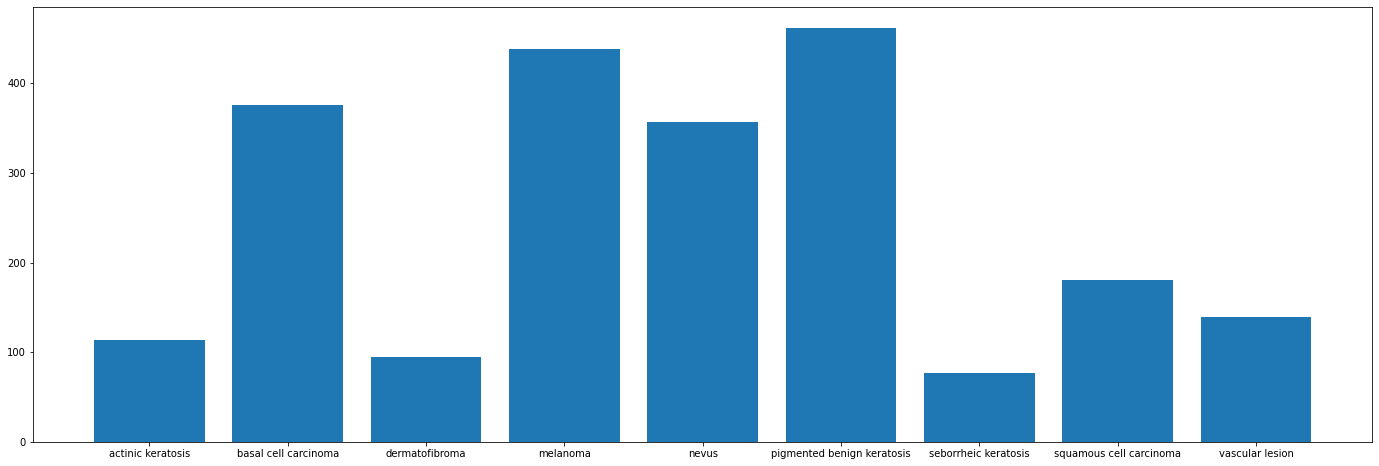

In [26]:
import matplotlib.pyplot as plt

data = dict()

for c in class_names:
    data[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(24)
f.set_figheight(8)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? seborrheic_keratosis
#### - Which classes dominate the data in terms proportionate number of samples? - pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [28]:
print(path_to_training_dataset)

/content/gdrive/My Drive/Upgrad/Resources/Assignments/CNN- melonoma/Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Train


In [29]:
import Augmentor
for i in class_names:
    print(i)
    p = Augmentor.Pipeline(path_to_training_dataset +"/"+ i)
    print(p)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

actinic keratosis
Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Upgrad/Resources/Assignments/CNN- melonoma/Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Train/actinic keratosis/output.<Augmentor.Pipeline.Pipeline object at 0x7f96824a2050>


Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F95EA388C10>: 100%|██████████| 500/500 [00:20<00:00, 24.74 Samples/s]


basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Upgrad/Resources/Assignments/CNN- melonoma/Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Train/basal cell carcinoma/output.<Augmentor.Pipeline.Pipeline object at 0x7f9556170a50>


Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F95560398D0>: 100%|██████████| 500/500 [00:20<00:00, 23.82 Samples/s]


dermatofibroma
Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Upgrad/Resources/Assignments/CNN- melonoma/Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Train/dermatofibroma/output.<Augmentor.Pipeline.Pipeline object at 0x7f95560da510>


Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F96824A2050>: 100%|██████████| 500/500 [00:21<00:00, 23.38 Samples/s]


melanoma
Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Upgrad/Resources/Assignments/CNN- melonoma/Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Train/melanoma/output.<Augmentor.Pipeline.Pipeline object at 0x7f9556436450>


Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F955610AFD0>: 100%|██████████| 500/500 [01:35<00:00,  5.26 Samples/s]


nevus
Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Upgrad/Resources/Assignments/CNN- melonoma/Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Train/nevus/output.<Augmentor.Pipeline.Pipeline object at 0x7f95561a5410>


Processing <PIL.Image.Image image mode=RGB size=853x680 at 0x7F954CDF4390>: 100%|██████████| 500/500 [01:20<00:00,  6.24 Samples/s]


pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Upgrad/Resources/Assignments/CNN- melonoma/Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Train/pigmented benign keratosis/output.<Augmentor.Pipeline.Pipeline object at 0x7f95ea440ad0>


Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9556167390>: 100%|██████████| 500/500 [00:18<00:00, 27.62 Samples/s]


seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Upgrad/Resources/Assignments/CNN- melonoma/Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Train/seborrheic keratosis/output.<Augmentor.Pipeline.Pipeline object at 0x7f954cdc5d50>


Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F95EA3DDBD0>: 100%|██████████| 500/500 [00:41<00:00, 12.00 Samples/s]


squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Upgrad/Resources/Assignments/CNN- melonoma/Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Train/squamous cell carcinoma/output.<Augmentor.Pipeline.Pipeline object at 0x7f955610d8d0>


Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F95561947D0>: 100%|██████████| 500/500 [00:18<00:00, 27.31 Samples/s]


vascular lesion
Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Upgrad/Resources/Assignments/CNN- melonoma/Skin-cancer-ISIC-The-International-Skin-Imaging-Collaboration/Train/vascular lesion/output.<Augmentor.Pipeline.Pipeline object at 0x7f9556194410>


Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F954CDDBF90>: 100%|██████████| 500/500 [00:18<00:00, 27.10 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [30]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [31]:
import os
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# path_list

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# lesion_list_new

In [33]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [34]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [35]:
new_df['Label'].value_counts()

pigmented benign keratosis    500
nevus                         500
actinic keratosis             500
dermatofibroma                500
basal cell carcinoma          500
melanoma                      500
vascular lesion               500
seborrheic keratosis          500
squamous cell carcinoma       500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [36]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [37]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_to_training_dataset,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  labels='inferred',
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [38]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  labels='inferred',
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [39]:

#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer


#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# Adding Normalisation
model.add(BatchNormalization())
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# Adding Normalisation
model.add(BatchNormalization())

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# Adding Normalisation
model.add(BatchNormalization())

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [40]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

#### **Todo:**  Train your model

In [41]:
epochs = 50

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

batch_size = 10
history = model.fit(train_ds,
  epochs = epochs, verbose = 1, validation_data=val_ds , callbacks=[learning_rate_reduction])

Epoch 1/50
169/169 [==============================] - 44s 248ms/step - loss: 5.7879 - accuracy: 0.2723 - val_loss: 6.6948 - val_accuracy: 0.1121 - lr: 0.0010
Epoch 2/50
169/169 [==============================] - 31s 178ms/step - loss: 3.0119 - accuracy: 0.3233 - val_loss: 4.6884 - val_accuracy: 0.1663 - lr: 0.0010
Epoch 3/50
169/169 [==============================] - 31s 177ms/step - loss: 2.0814 - accuracy: 0.3948 - val_loss: 2.6969 - val_accuracy: 0.2799 - lr: 0.0010
Epoch 4/50
169/169 [==============================] - 32s 184ms/step - loss: 1.6899 - accuracy: 0.4358 - val_loss: 7.4085 - val_accuracy: 0.2762 - lr: 0.0010
Epoch 5/50
169/169 [==============================] - 31s 174ms/step - loss: 1.3730 - accuracy: 0.4917 - val_loss: 2.2974 - val_accuracy: 0.4595 - lr: 0.0010
Epoch 6/50
169/169 [==============================] - 30s 174ms/step - loss: 1.3039 - accuracy: 0.5122 - val_loss: 1.4912 - val_accuracy: 0.5278 - lr: 0.0010
Epoch 7/50
169/169 [==============================] 

In [42]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


43/43 [==============================] - 6s 114ms/step - loss: 0.5906 - accuracy: 0.8552
Accuracy:  0.9547477960586548
Validation Accuracy:  0.8552338480949402
Loss:  0.10815878957509995
Validation Loss 0.5905780792236328


#### **Todo:**  Visualize the model results

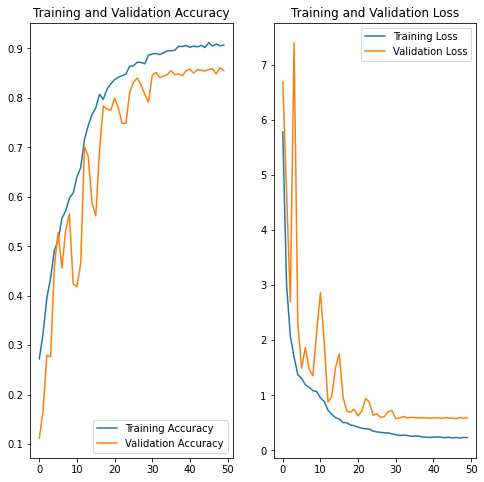

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The class rebalance helped in reducing overfititng of the data and thus it was given very good results compared to previous 2 models